<center>
<img src="imagenes/logo-FCEN.png" alt="FCEN" style="width:1200px;"/>
</center>

<font size= "6">Curso de posgrado y materia optativa     
**Programación avanzada en R en Biología** </font>

**Docentes:**

*   Dra. Melisa Olave
*   Dra. Laura García
*   Lic. Leonardo Gatica
*   Lic. María Virginia Chirilá
*   Belén Battistela

Material elaborado por María Virginia Chirilá

---
<font size= "6">**Clase 7 - Modelos Lineales**</font>

# 🚀Objetivos de esta clase
* Reconocer el tipo de modelo adecuado según la distribución de la variable respuesta (modelos lineales, generalizados y mixtos).
* Explorar las relaciones entre variables y detectar patrones que sugieran estructuras jerárquicas o efectos no lineales.
* Ajustar modelos lineales simples, modelos generalizados y modelos generalizados mixtos y evaluar sus supuestos (normalidad de residuos, homogeneidad de varianzas, independencia)
* Comparar modelos con diferentes estructuras mediante criterios de selección como AIC y evaluación gráfica de residuos (DHARMa).
* Visualizar resultados de forma clara, representando efectos fijos y aleatorios en gráficos interpretables.
* Fomentar el razonamiento estadístico aplicado

# Índice
<p style="text-align: justify; line-height: 1.6; font-size:16px">

- [1 - Introducción](#1)
- [2 - Repasamos los supuestos de los modelos lineales](#2)
- [3 - Análisis de varianzas ANOVA](#3)
    - [3.1 - Ajuste del modelo ANOVA](#3.1)
    - [3.2 - Evaluación gráfica de supuestos](#3.2)
    - [3.3 - Evaluación de supuestos con pruebas de hipótesis](#3.3)
    - [3.4 - Comparaciones post-hoc: prueba de Tukey](#3.4)
    - [3.5 - Gráfico de resultados](#3.5)
- [4 - Regresión lineal simple](#4)
    - [4.1 - Ajuste del modelo de regresión lineal simple](#4.1)
    - [4.2 - Evaluación de supuestos](#4.2)
- [5 - Modelos lineales generalizados (GLM o MLG) ](#5)
    - [5.1 - Ajuste del modelo de regresión Poisson](#5.1)
    - [5.2 - Evaluación de supuestos del modelo de regresión de Poisson](#5.2)
    - [5.3 - Sobredispersión](#5.3)
    - [5.4 - ¿Qué hacer cuando hay sobredispersión?](#5.4)
- [6 - Modelos lineales generalizados mixtos (GLMM o MLGM) ](#6)
    - [6.1 - Ajuste de GLMM](#6.1)
    - [6.2 - Evaluación de supuestos de GLMM](#6.2)
    - [6.3 - Comparación y selección del mejor modelo](#6.3)
    - [6.4 - Resultados del mejor modelo](#6.4)
- [7 - Resumen final ](#7)
    - [7.1 - Check-list para ajustar modelos](#7.1)
- [8 - Sección adicional: Regresiones múltiples ](#8)
- [9 - Referencias](#9)
</p>

In [6]:
install.packages("DHARMa")

Warning message:
"package 'DHARMa' is in use and will not be installed"


In [3]:
install.packages("glmmTMB")

Installing package into 'C:/Users/vicky/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'reformulas'




package 'reformulas' successfully unpacked and MD5 sums checked
package 'glmmTMB' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vicky\AppData\Local\Temp\RtmpwV0eqp\downloaded_packages


In [4]:
install.packages("MASS")

Installing package into 'C:/Users/vicky/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vicky\AppData\Local\Temp\RtmpwV0eqp\downloaded_packages


# **Paquetes**

In [7]:
# Paquetes
library(DHARMa)
library(glmmTMB)
library(MASS)

<a name='1'></a>
#  **1) Introducción**

Los modelos lineales permiten explorar relaciones entre una variable respuesta y una o más variables predictoras. Esta guía acompaña ejercicios prácticos, y está organizada desde lo más simple a lo más complejo: modelos lineales (LM), modelos lineales generalizados (GLM), y modelos lineales mixtos generalizados (GLMM). No es la idea trabajar en profundidad sobre la estadística detrás de cada modelo sino, más bien presentarlos como opciones para abordar problemas frecuentes que se presentan cuando queremos analizar nuestros datos.





<a name='2'></a>
#  **2) Repasamos los supuestos de los modelos lineales** ✅
**1) Linealidad** 📏

Asumimos que la relación entre las variables predictoras y la respuesta es lineal. Esto significa que el cambio esperado en la variable respuesta es proporcional al cambio en el predictor.

**2) Independencia de los errores** 📚

Los residuos (errores del modelo) deben ser independientes entre sí. Violaciones comunes: datos temporales (autocorrelación), datos agrupados (campos, sitios, individuos), etc.

**3) Homoscedasticidad (homogeneidad de varianzas)** 👭

La varianza de los errores debe ser constante a lo largo de los niveles de los predictores.

Si hay heterocedasticidad, se distorsionan las pruebas estadísticas y los intervalos de confianza.

**4) Normalidad de los errores** 🗻

Los residuos del modelo deben seguir una distribución normal.
Este supuesto es importante principalmente para la inferencia estadística (valores p, intervalos de confianza), no tanto para las predicciones.

**5) No colinealidad entre predictores** ↗ ↘

Los predictores no deben estar altamente correlacionados entre sí.
La multicolinealidad puede inflar las varianzas de los coeficientes y dificultar su interpretación.



<a name='3'></a>
#  **3) Análisis de varianzas (ANOVA)** 🔢
El modelo ANOVA (Análisis de Varianza) es un caso particular de un modelo lineal aplicado con predictores categóricos. Este modelo se utiliza para evaluar diferencias entre grupos. Se utiliza cuando se quiere saber si las medias entre dos o más grupos son estadísticamente diferentes.

En esta parte del notebook trabajaremos con una serie de datos correspondientes a rendimientos de 60 campos de un mismo cultivo los cuales fueron expuestos a tres tratamientos de suplementación con abejas melíferas: control, una colmena y tres colmenas. El objetivo es evaluar si el rendimiento del cultivo varía entre tratamientos de suplementación.

Aprenderemos a: ajustar un ANOVA, evaluar los supuestos de normalidad y homogeneidad de varianzas y realizaremos pruebas ad-hoc

In [2]:
# Carga de datos
path <- "./data/colmenas.csv"
datos_anova <- read.table(path, header = T, sep = ",", dec = "." )

In [3]:
# Inspeccionamos los datos
head(datos_anova)

,campo,tratamiento,rendimiento,colmenas_num
,<int>,<chr>,<dbl>,<int>
1,1,sin_colmenas,943.9524,0
2,2,sin_colmenas,976.9823,0
3,3,sin_colmenas,1155.8708,0
4,4,sin_colmenas,1007.0508,0
5,5,sin_colmenas,1012.9288,0
6,6,sin_colmenas,1171.5065,0


<a name='3.1'></a>
## 3.1) Ajuste del modelo ANOVA


In [4]:
# Ajuste del modelo ANOVA
modelo_aov <- aov(rendimiento ~ tratamiento, data = datos_anova)


In [5]:
summary(modelo_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
tratamiento  2 631673  315836   37.14 4.72e-11 ***
Residuals   57 484762    8505                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<a name='3.2'></a>
## 3.2) Evaluación gráfica de supuestos

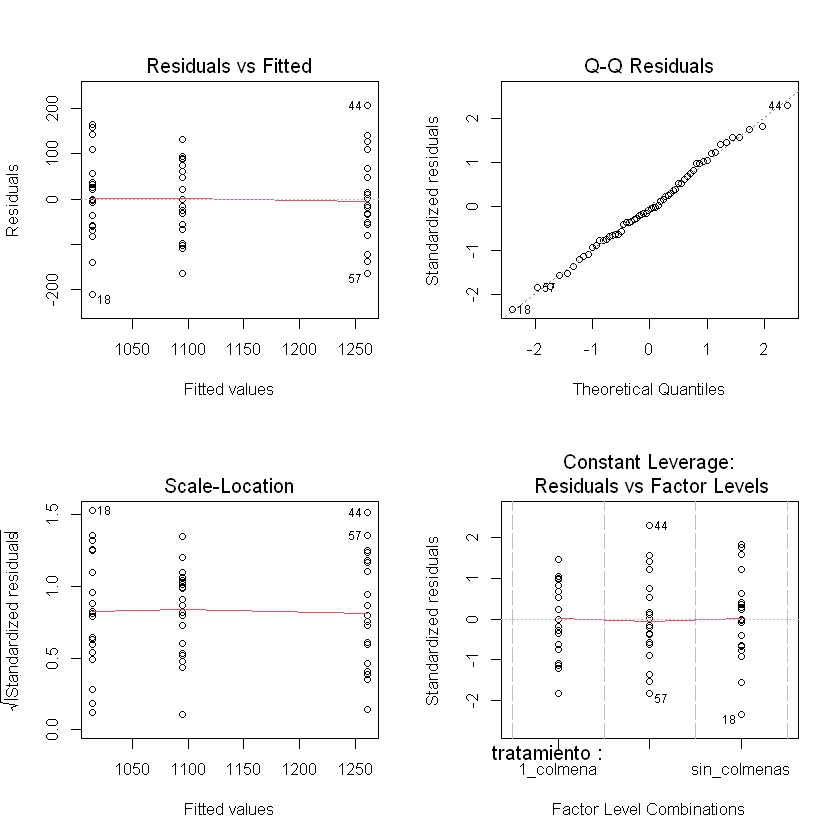

In [6]:
par(mfrow = c(2,2))
plot(modelo_aov)

<a name='3.3'></a>
## 3.3) Evaluación de supuestos con pruebas de hipótesis

### Test de Normalidad de Shapiro-Wilk
La hipótesis nula (H0): Los residuos siguen una distribución normal.  
Hipótesis alternativa (H1): Los residuos no siguen una distribución normal.

Si el p-valor es mayor al nivel de significación (usualmente 0.05) NO se rechaza la H0 y podemos decir que los residuos del modelo tienen distribución normal.

In [7]:
residuos <- residuals(modelo_aov)
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.99284, p-value = 0.9791


### Test de Homogeneidad de varianzas de Bartlett
La hipótesis nula (H0): Las varianzas de los residuos son iguales.  
Hipótesis alternativa (H1): Las varianzas de los residuos difieren.

Si el p-valor es mayor al nivel de significación (usualmente 0.05) NO se rechaza la H0 y podemos decir que los residuos del modelo tienen varianzas homogéneas.

In [8]:
bartlett.test(residuos, datos_anova$tratamiento)


	Bartlett test of homogeneity of variances

data:  residuos and datos_anova$tratamiento
Bartlett's K-squared = 0.54755, df = 2, p-value = 0.7605


<a name='3.4'></a>
## 3.4) Comparaciones post-hoc: prueba de Tukey

In [9]:
tukey_res <- TukeyHSD(modelo_aov)
tukey_res


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rendimiento ~ tratamiento, data = datos_anova)

$tratamiento
                             diff        lwr        upr     p adj
3_colmenas-1_colmena     165.7742   95.59676  235.95172 0.0000014
sin_colmenas-1_colmena   -80.7119 -150.88939  -10.53442 0.0204624
sin_colmenas-3_colmenas -246.4861 -316.66362 -176.30866 0.0000000


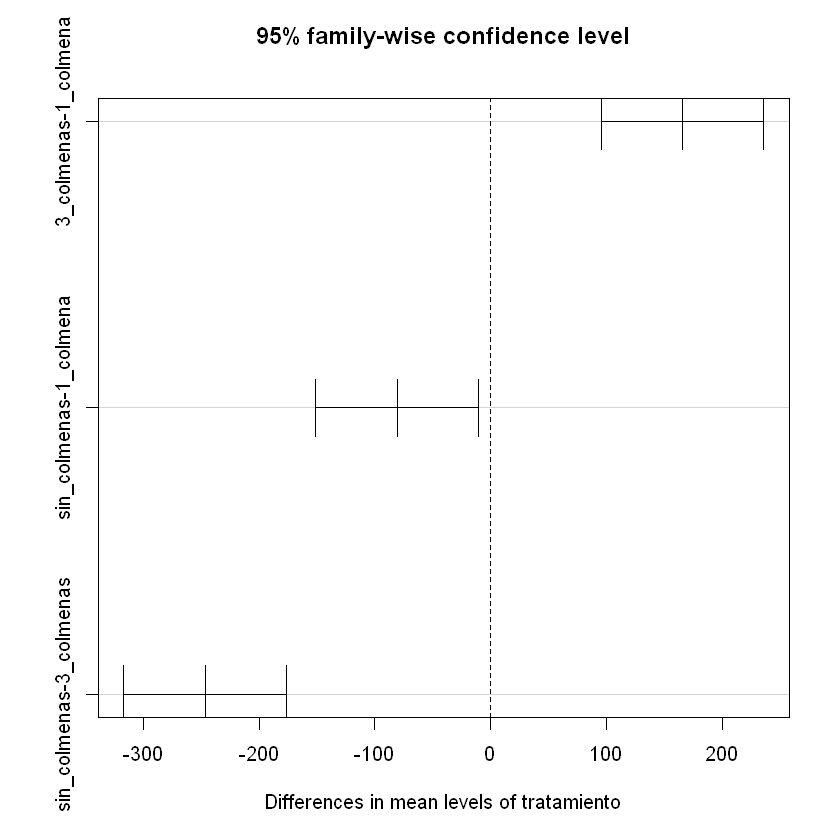

In [10]:
plot(tukey_res)

<a name='3.5'></a>
## 3.5) Gráfico de resultados

In [13]:
#Ajustamos colores
colores1 <- c("gold", "gold3", "khaki1")#Colores HEX
tratamientos<- levels(datos_anova$tratamiento)
colores_tratamiento <- setNames(colores1, tratamientos)

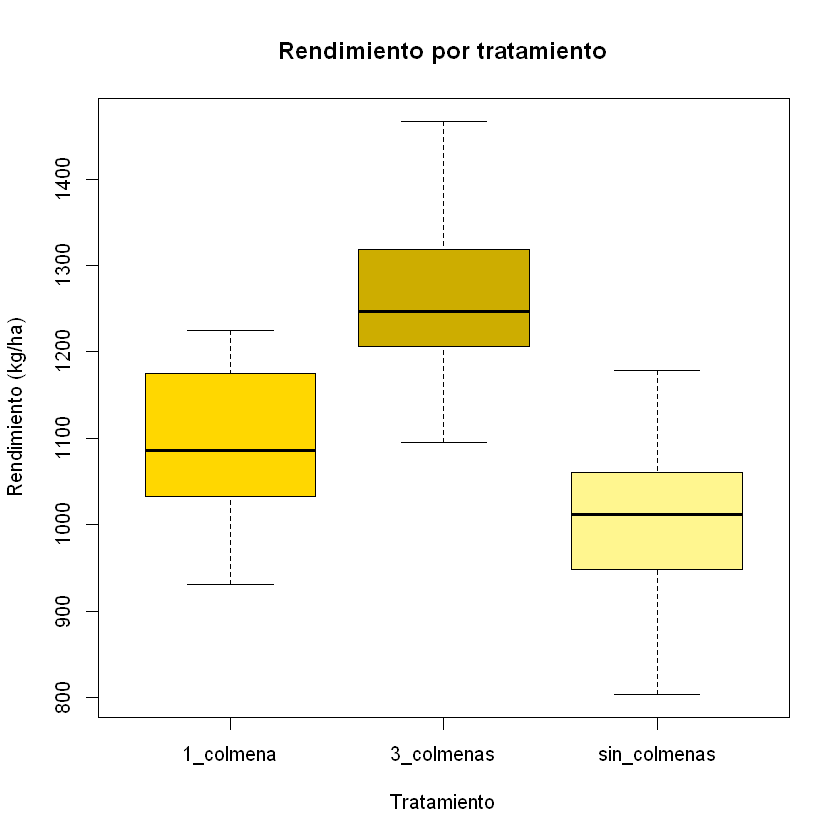

In [15]:
boxplot(rendimiento ~ tratamiento,
        data = datos_anova,
        col = colores_tratamiento,
        ylab = "Rendimiento (kg/ha)",
        xlab= "Tratamiento",
        main = "Rendimiento por tratamiento")


Agregamos letras para mostrar que son significativamente diferentes. Como todos los tratamientos son diferentes entre si entonces les corresponde una letra diferente a cada uno.    
Calculamos medias por tratamiento. 


In [17]:
# La función Aggregate, divide los datos en subconjuntos, calcula estadísticas de resumen para cada 
# subconjunto y devuelve el resultado en un grupo por formulario.

medias <- aggregate(rendimiento ~ tratamiento, data = datos_anova, mean)

# Aqui estimamos la media de rendimiento por tratamiento, esta medida nos
# permite ubicar las etiquetas de texto

Creamos un data frame con los tratamientos y asignamos las letras por tratamiento de acuerdo a los resultados del Test Tukey. En este caso todas las letras son diferentes por que hay diferencias significativas entre todos.   
Pero puede pasar que dos tratamientos no sean significativamente diferentes. En ese caso se le asigna una letra igual.

In [18]:
etiquetas <- data.frame(
  tratamiento = c("sin_colmenas", "1_colmena", "3_colmenas"),
  letra = c("a", "b", "c")
)

# Unir con las medias, en el data frame medias hay una columna llamada
# rendimiento con el rendimiento medio por tratamiento. La media nos ayudará a
# ubicar las letras en el gráfico más adelante

etiquetas <- merge(medias, etiquetas, by = "tratamiento")


In [19]:
etiquetas

tratamiento,rendimiento,letra
<chr>,<dbl>,<chr>
1_colmena,1094.874,b
3_colmenas,1260.649,c
sin_colmenas,1014.162,a


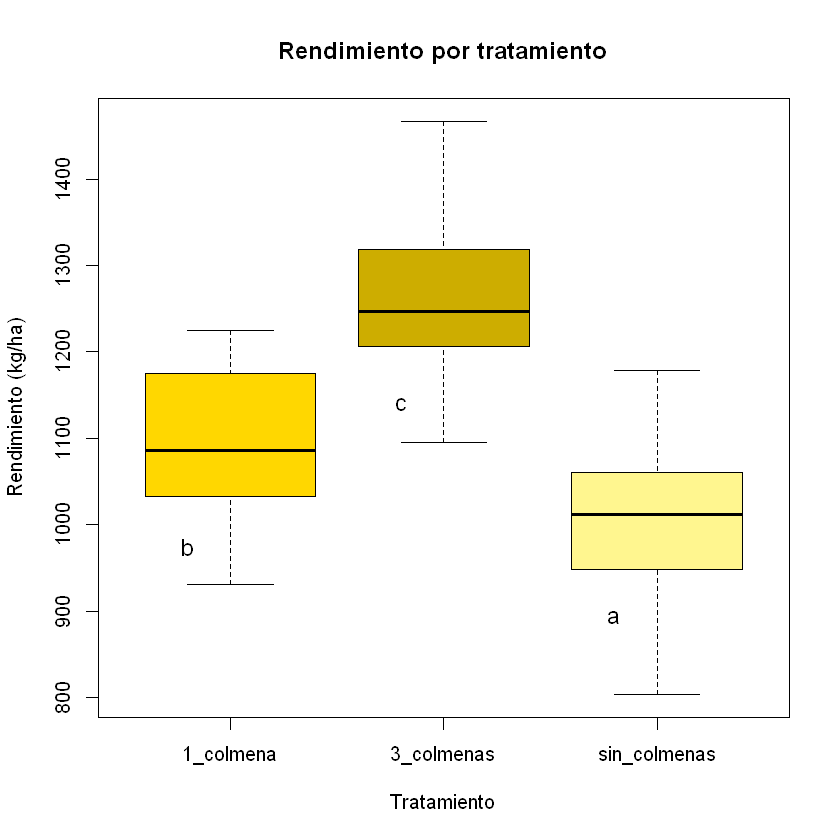

In [20]:
# Graficar boxplot
boxplot(rendimiento ~ tratamiento,
        data = datos_anova,
        col = colores_tratamiento,
        ylab = "Rendimiento (kg/ha)",
        xlab= "Tratamiento",
        main = "Rendimiento por tratamiento")

# Agregar letras sobre las cajas, etiquetas$rendimiento = media de rendimiento
# por tratamiento, en x va las posiciones de en el eje x y en y van las
# posiciones del eje y. En este las posiciones en y las estimamos gracias a la
# media. En la linea de codigo donde esta y le estamos diciendo a R
# que ubique las letras en una posición vertical igual a la media de rendimiento
# del tratamiento (etiquetas$rendimiento), menos el 15% del valor mínimo del
# rendimiento en todo el dataset. Si le restamos el 100% del valor las etiquetas
# estarán muy abajo y quizás se pierdan en el grafico.

text(x = c(0.8,1.8,2.8),
     y = etiquetas$rendimiento - 0.15 * min(datos_anova$rendimiento),
     labels = etiquetas$letra,
     cex = 1.2)

<a name='4'></a>
#  **4) Regresión lineal simple**
Los modelos de regresión nos permiten evaluar relaciones entre variables. Las variables predictoras en estos modelos pueden ser continuas o categóricas. Estos modelos nos permiten evaluar el efecto de un predictor sobre una variable respuesta y su dirección. Se centran en la estimación de coeficientes individuales para cada predictor y no en la comparación entre grupos.

Un modelo de regresión lineal simple tiene esta estructura básica:

$𝑦𝑖$ = $𝛽_0$ +$𝛽_1$$𝑥_1$ + $𝜀𝑖$

Donde:      
$𝑦𝑖$: Variable respuesta.     
$𝛽_0$: Ordenada al origen, valor de y cuando x=0  
$𝛽_1$: Pendiente, cambios ocurridos en y por cada incremento en una unidad de x     
$𝑥_1$: Variable regresora o independiente     
$𝜀𝑖$ : Error o variabilidad no explicada. Para cada valor en particular se denomina residuo   
$𝑖$: el número de unidad o elemento     

En una regresión $𝛽_0$ y $𝛽_1$ se estiman por el método de mínimos cuadrados. Este método nos permite obtener una recta que va a explicar a nuestros datos. En la regresión además se reliza una prueba de hipótesis para $𝛽_0$ y $𝛽_1$. Básicamente se evalúa si la pendiente y la ordenada son diferentes de cero. Si lo son y el p-valor de esta prueba de hipótesis es menor a 0.05, entonces podemos decir que los parametros son son diferentes de cero y que el resultado es estadísticamente significativo.

Ahora, ajustemos nuestro primer modelo de regresión lineal

**Conjunto de datos y pregunta de trabajo**

De aquí en adelante trabajaremos con un conjunto de datos que corresponden al registro de visitas de abejas en plantas de un cultivo. Se plantea estudiar si la densidad de flores influye sobre la cantidad de visitas de abejas que reciben plantas individuales. El trabajo de campo se realizó en cinco campos en los cuales se seleccionó al azar 10 parcelas, en estas se seleccionó una planta también al azar, y se registró las visitas recibidas por esta en un lapso de una hora. En cada parcela además se contó el número de flores.

**Variable respuesta/dependiente:** número de visitas por planta  
**Variable predictora/independiente:** número de flores     
**Unidad estadística:** planta

**Nota:** El conjunto de datos es simulado y la situación es hipotética.

In [21]:
#Carga de datos
path2 <- "./data/visitas-abejas.csv"
datos <- read.table(path2, header = T, sep=",", dec=".")

In [22]:
# Para evitar problemas en el ajuste y graficos convertimos a factor a las variables
# campo y parcela
datos$campo <- as.factor(datos$campo)
datos$parcela <- as.factor(datos$parcela)

In [23]:
# Vemos como estan organizados
head(datos)

,campo,parcela,flores_parcela,visitas
,<fct>,<fct>,<int>,<int>
1,1,1,97,5
2,1,2,106,3
3,1,3,87,3
4,1,4,105,3
5,1,5,114,4
6,1,6,104,4


<a name='4.1'></a>
## 4.1) Ajuste del modelo de regresión lineal simple

In [75]:
modelo_lm <- lm(visitas ~ flores_parcela, data = datos)
summary(modelo_lm)


Call:
lm(formula = visitas ~ flores_parcela, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7223 -1.7182 -0.9860  0.8309  9.4038 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)    -5.15225    4.50638  -1.143   0.2586  
flores_parcela  0.08662    0.04480   1.934   0.0591 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.104 on 48 degrees of freedom
Multiple R-squared:  0.07227,	Adjusted R-squared:  0.05294 
F-statistic: 3.739 on 1 and 48 DF,  p-value: 0.05907


<a name='4.2'></a>
## 4.2) Evaluación de supuestos

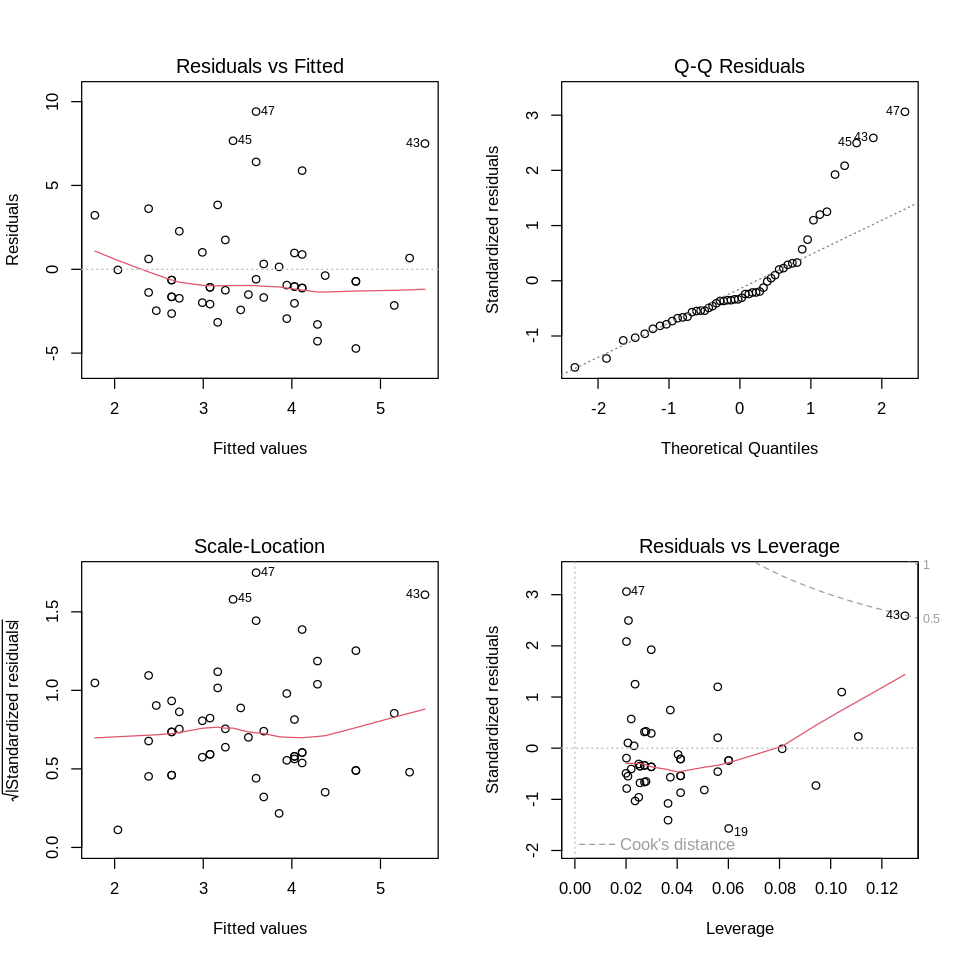

In [76]:
par(mfrow = c(2, 2)) #divide la ventana gráfica en una cuadrícula de 2 filas y 2 columnas
plot(modelo_lm)
par(mfrow = c(1, 1))

Vemos que los patrones del QQ-plot y de los residuos vs. predichos tienen patrones raros. Estos patrones demuestran que no se cumplen los supuestos de normalidad y homogeneidad de varianzas. Por lo tanto, no podemos sacar conclusiones de nuestro modelo porque los resultados no son válidos.

<font size =5 color = #bc1010 > **¡¿Ahora que hacemos?!** 😱😱😱😱 </font>

<a name='5'></a>
#  **5) Modelos lineales generalizados (GLM o MLG)**
Nuestra variable respuesta es el **número de visitas de abejas por planta**. Esta variable es una **variable cuantitativa discreta y positiva**. Discreta porque asume valores enteros, no puede asumir valores decimales (una planta no puede recibir 2.3 visitas por ejemplo) y positiva porque los valores enteros son mayores a cero (no pueden haber visitas negativas). Por definición esta variable respuesta sigue una distribución de Poisson.     

Este tipo de variables pueden seguir una distribución normal si el número de conteos es realmente alto, en estos casos ajustar un modelo de regresión lineal simple como planteamos antes puede servir. Pero en la realidad pasa que tener numerosos registros es raro y que por lo tanto este tipo de variables no puedan ser ajustadas con una distribución normal, en estos casos es recomendable ajustar modelos lineales con distribución de Poisson. Este tipo de modelos que no siguen una distribución normal de los datos se llaman **Modelos Lineales Generalizados.**      

<center>
<img src="imagenes/poisson.png" alt="FCEN" style="width:600px;"/>
</center>

Los modelos lineales generalizados tienen las siguientes características generales:    
* 1) Asumen que la variable respuesta posee alguna de las siguientes distribuciones: Binomial, Poisson, Lognormal, entre otras, incluida también la distribución Normal.
* 2) En función de la distribución de probabilidades que se utilice se selecciona una función de enlace que une a la variable respuesta con el modelo. Esta función permite modelar el valor esperado usando un modelo lineal.
* 3) La variabilidad que estos modelos representan no es la varianza, sino que se denomina Devianza (en inglés Deviance), siendo ésta una medida de máxima verosimilitud


Un modelo de regresión de Poisson tiene esta estructura básica:

$logE[Y_𝑖]$ = $𝛽_0$ +$𝛽_1$$𝑥_1$ + $𝜀_𝑖$

Donde:      
$E[Y_𝑖]$: Media esperada del conteo     
$𝛽_0$: Ordenada al origen, valor de y cuando x=0  
$𝛽_1$: Pendiente, cambios ocurridos en $log(E[Y_𝑖])$  por cada incremento en una unidad de x     
$𝑥_1$: Variable regresora o independiente     
$𝜀𝑖$ : Error o variabilidad no explicada. Para cada valor en particular se denomina residuo   
$𝑖$: el número de unidad o elemento     


**Con esta información en mente ajustemos nuestro modelo lineal generalizado**

<a name='5.1'></a>
## 5.1) Ajuste de modelo de regresión Poisson

In [77]:
modelo_glm <- glm(visitas ~ flores_parcela, data = datos, family = poisson)
summary(modelo_glm)


Call:
glm(formula = visitas ~ flores_parcela, family = poisson, data = datos)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -1.177425   0.776076  -1.517  0.12923   
flores_parcela  0.024048   0.007537   3.191  0.00142 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 130.20  on 49  degrees of freedom
Residual deviance: 120.13  on 48  degrees of freedom
AIC: 259.11

Number of Fisher Scoring iterations: 5


<a name='5.2'></a>
## 5.2) Evaluación de supuestos del modelo de regresión Poisson

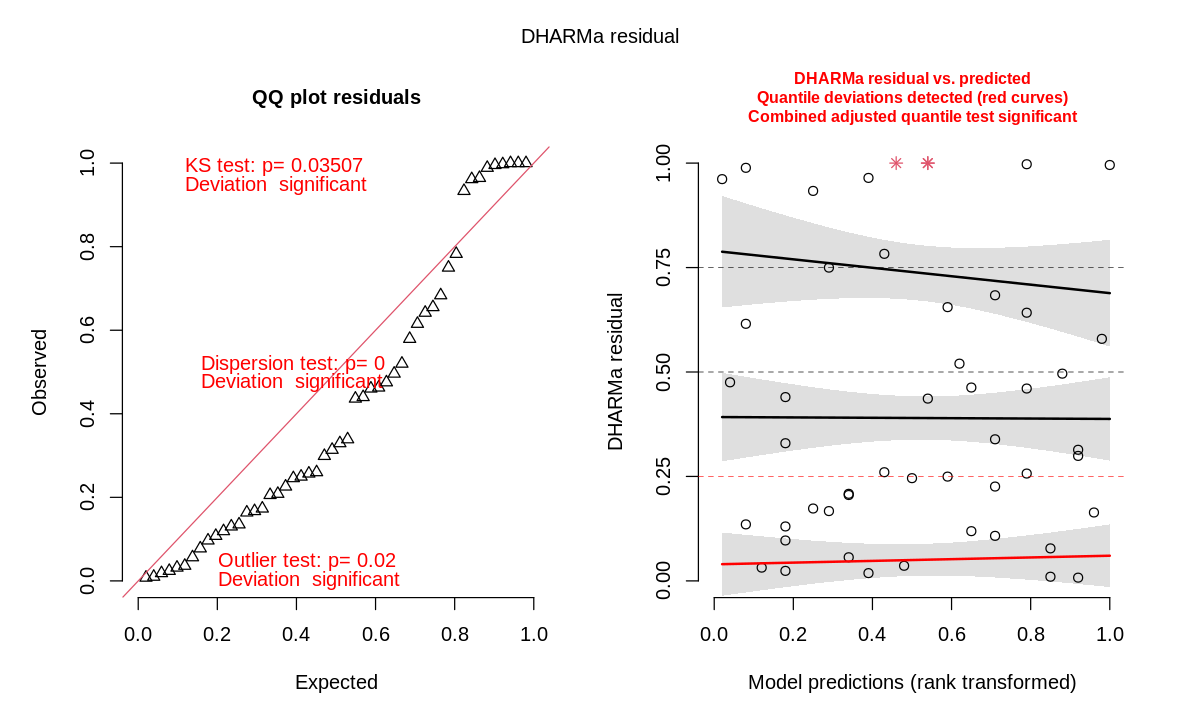

In [78]:
res_glm <- simulateResiduals(modelo_glm)
options(repr.plot.width = 10, repr.plot.height = 6) #Agrandar ventana del grafico
plot(res_glm)


Vemos que los patrones del QQ-plot y de los residuos vs. predichos tienen patrones raros de nuevo! 🥵. Estos patrones demuestran que no se cumplen los supuestos de normalidad y homogeneidad de varianzas. Por lo tanto, no podemos sacar conclusiones de nuestro modelo porque los resultados no son válidos.

<font size =5 color = #bc1010 > **No de nuevo!! ¡¿Que hacemos?!** 😱😱😱😱 </font>

<a name='5.3'></a>
## 5.3) Sobredispersión

Uno de los problemas más comunes en modelos de regresión con distribución Poisson es la sobredispersión.

**Un modelo está sobredisperso si la varianza observada en los datos es mayor que la varianza esperada por el modelo**.

Si existe sobredispersión los errores estándar pueden estar subestimados y los valores p no son confiables. **¿Cómo la evaluamos?**


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 2.6941, p-value < 2.2e-16
alternative hypothesis: two.sided


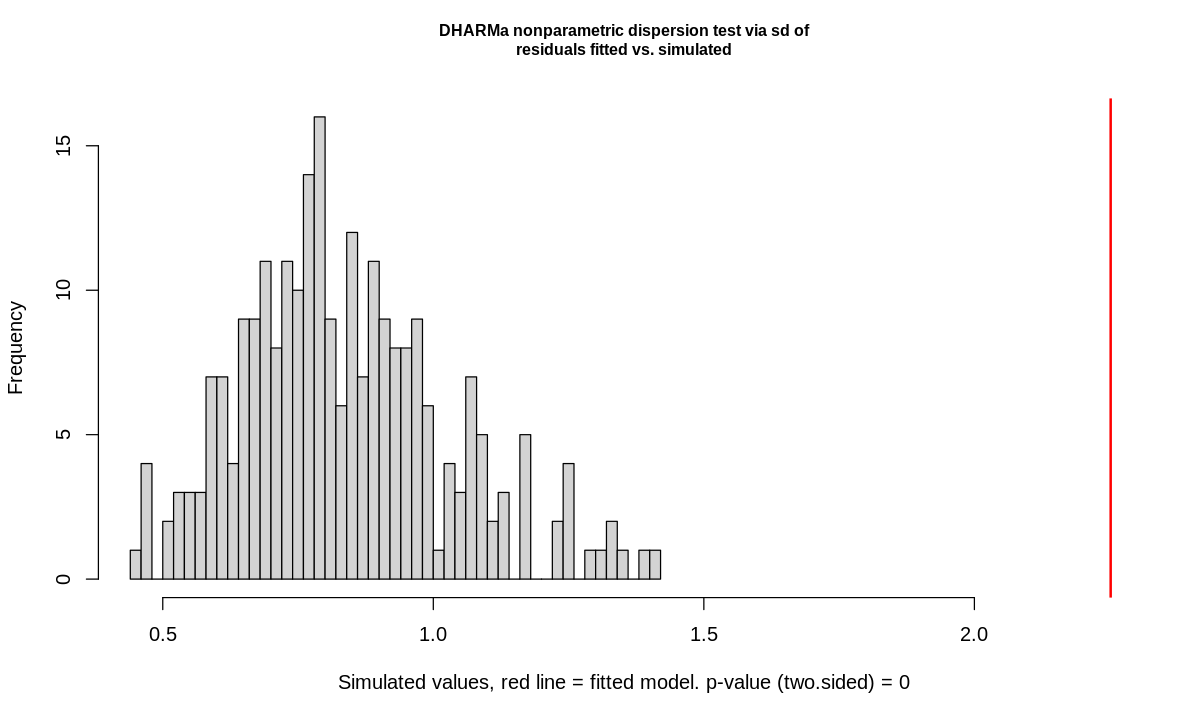

In [79]:
testDispersion(res_glm)

El valor de dispersión surge de la razón entre la devianza y los grados de libertad. Si el valor de dispersión es:
* ≈ 1: no hay sobredispersión (modelo adecuado).
* \> 1.5: hay sobredispersión.
* \> 2: sobredispersión importante.

<a name='5.4'></a>
## 5.4) ¿Qué hacer cuando hay sobredispersión?

Cuando nos encontramos frente a sobredispersión lo más común es tratar de controlara ajustando un nuevo modelo con distribución binomial negativa en lugar de Poisson.

In [80]:
modelo_glm_bn <- glm.nb(visitas ~ flores_parcela, data = datos)
summary(modelo_glm_bn)


Call:
glm.nb(formula = visitas ~ flores_parcela, data = datos, init.theta = 2.508666103, 
    link = log)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -1.06197    1.21193  -0.876    0.381  
flores_parcela  0.02291    0.01194   1.919    0.055 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(2.5087) family taken to be 1)

    Null deviance: 58.118  on 49  degrees of freedom
Residual deviance: 54.184  on 48  degrees of freedom
AIC: 234.86

Number of Fisher Scoring iterations: 1


              Theta:  2.509 
          Std. Err.:  0.894 

 2 x log-likelihood:  -228.856 

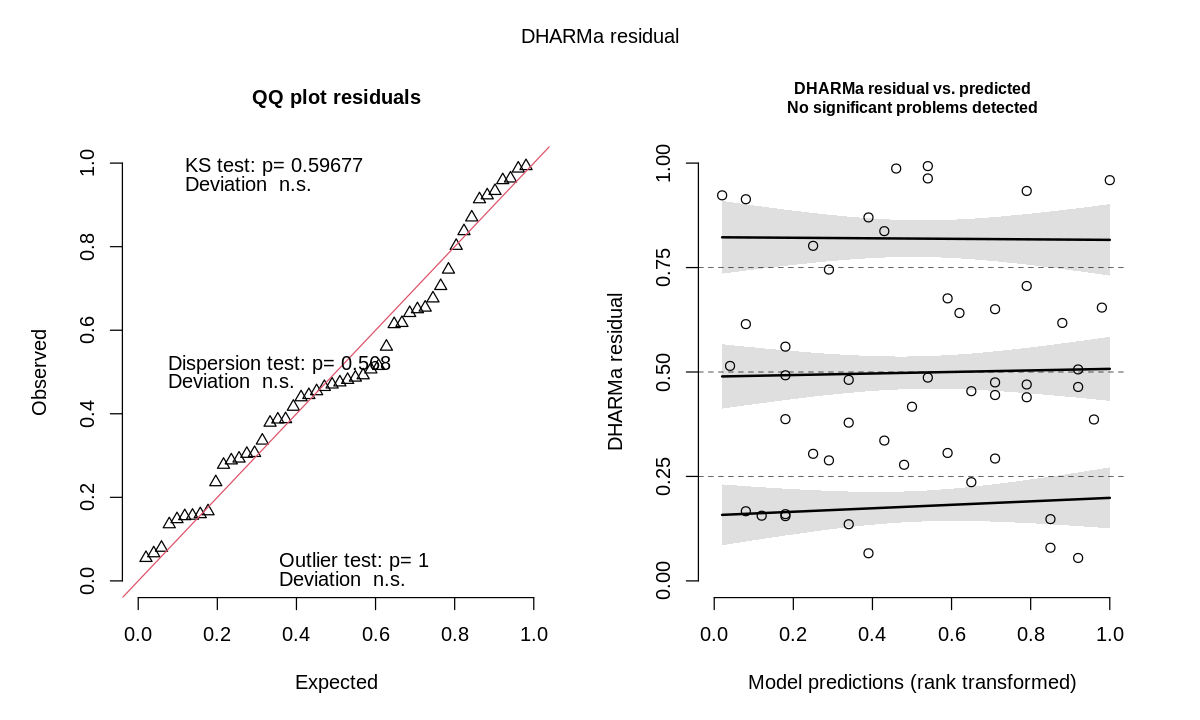

In [81]:
#Evaluamos supuestos
res_glm_bn <- simulateResiduals(modelo_glm_bn)
plot(res_glm_bn)


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 1.1041, p-value = 0.568
alternative hypothesis: two.sided


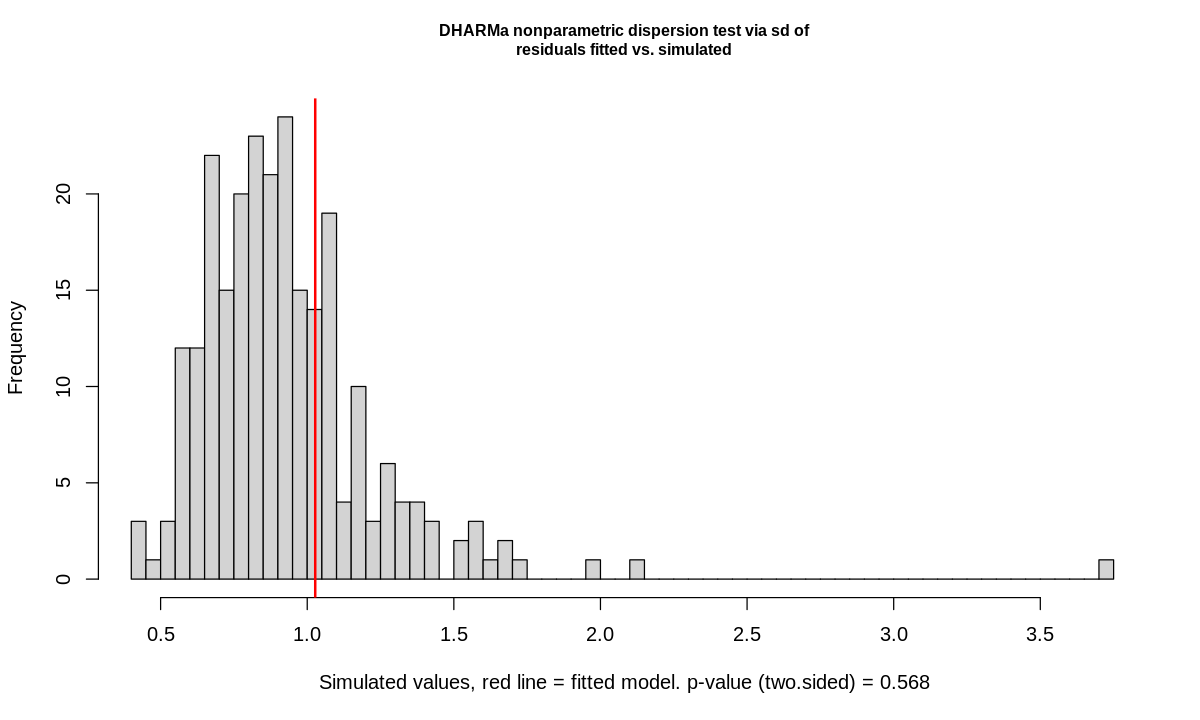

In [82]:
#Evaluamos de nuevo la dispersion
testDispersion(res_glm_bn)

<font size = 4 color = #bc1010 > **Si bien utilizar la distribución binomial negativa es una opción válida otro camino es investigar y pensar que esta ocasionando la sobredispersión de los datos y tratar de controlar eso.** </font>

<a name='6'></a>
#  **6) Modelos lineales generalizados mixtos (GLMM o MLGM)**

<font size= 4 color = #bc1010 > Si observamos en detalle nuestros datos **¿Podemos decir que estos son independientes?** </font>

In [83]:
head(datos, 12)

,campo,parcela,flores_parcela,visitas
,<fct>,<fct>,<int>,<int>
1,1,1,97,5
2,1,2,106,3
3,1,3,87,3
4,1,4,105,3
5,1,5,114,4
6,1,6,104,4
7,1,7,102,4
8,1,8,106,5
9,1,9,99,1


Nuestros datos fueron tomados en **cinco campos diferentes**.

Si ignoramos que los datos están agrupados por campo, estamos asumiendo que todas las observaciones son independientes entre sí, lo cual puede no ser cierto ya que las observaciones dentro de un mismo campo se pueden parecer más entre sí (por ejemplo, condiciones ambientales similares o manejo).  

La **falta de independencia** de mis datos puede estar provocando la sobredispersión aparente ya que puede provocar que el modelo:

* Subestime la varianza esperada.
* Muestre sobredispersión (la varianza observada es mayor que la esperada por el modelo).



Por suerte existen otro grupo de modelos lineales llamados **Modelos Lineales Generalizados Mixtos** que nos permiten lidear con esta falta de independencia entre observaciones. 🥳🥳🥳🥳🥳

Los modelos mixtos se llaman así porque además de los **factores fijos** (nuestros predictores) toman otros factores llamados aleatorios.

Estos **factores aleatorios** en términos sencillos **nos permiten indicarle al modelo que entre algunas unidades no existe independencia, sino que están correlacionadas**.

De esta manera podemos analizar el efecto de los predictores y a la vez controlamos la falta de independencia y sus consecuencias.

<font size=4 color = #bc1010 > **Con toda esta información en la cabeza estamos listos para ajustar nuestro GLMM** </font>



<a name='6.1'></a>
## 6.1) Ajuste de GLMM

In [84]:
#Ajuste de modelo glmm
modelo_glmm <- glmmTMB(visitas ~ flores_parcela + (1 | campo), data = datos, family = nbinom2)
summary(modelo_glmm)


 Family: nbinom2  ( log )
Formula:          visitas ~ flores_parcela + (1 | campo)
Data: datos

      AIC       BIC    logLik -2*log(L)  df.resid 
    211.9     219.5    -101.9     203.9        46 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 campo  (Intercept) 0.3435   0.5861  
Number of obs: 50, groups:  campo, 5

Dispersion parameter for nbinom2 family (): 31.8 

Conditional model:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -0.59166    0.82376  -0.718   0.4726  
flores_parcela  0.01646    0.00765   2.152   0.0314 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<a name='6.2'></a>
## 6.2) Evaluación de supuestos de GLMM


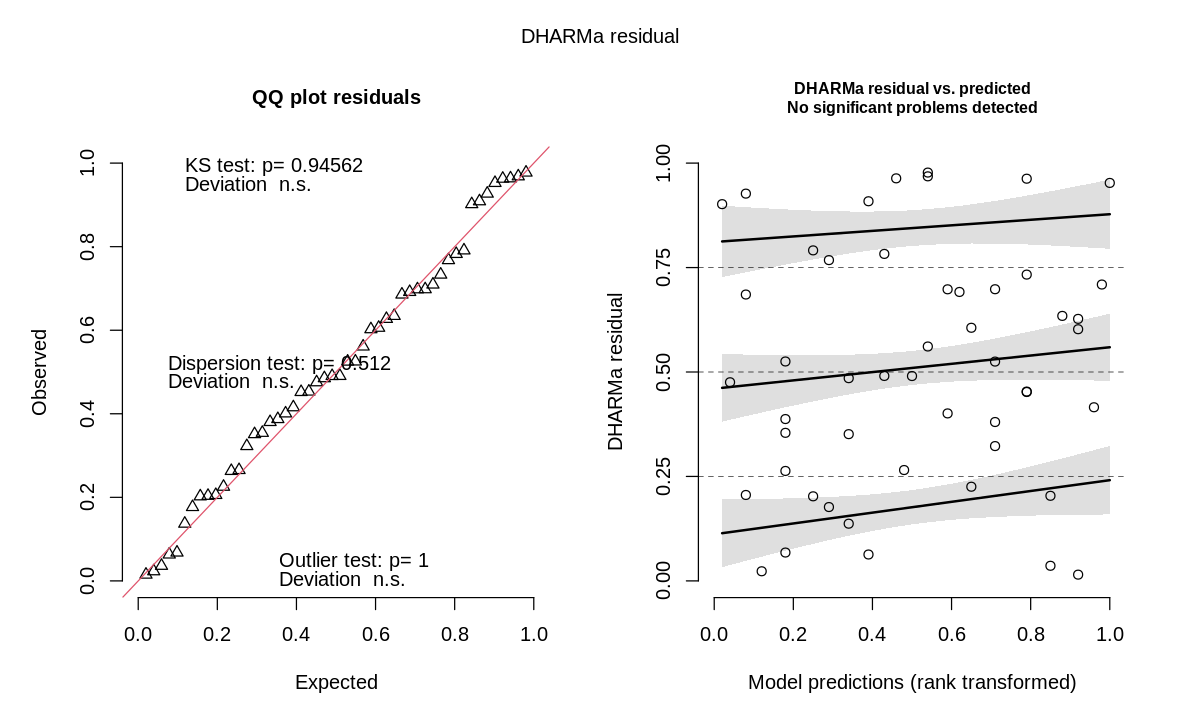

In [86]:
res_glmm <- simulateResiduals(modelo_glmm)
plot(res_glmm)

<a name='6.3'></a>
## 6.3) Comparación y selección del mejor modelo

In [85]:
AIC(modelo_lm, modelo_glm, modelo_glm_bn, modelo_glmm)

,df,AIC
,<dbl>,<dbl>
modelo_lm,3,259.1204
modelo_glm,2,259.1073
modelo_glm_bn,3,234.8561
modelo_glmm,4,211.8651


<a name='6.4'></a>
## 6.4) Resultados del mejor modelo


In [33]:
summary(modelo_glmm)

 Family: nbinom2  ( log )
Formula:          visitas ~ flores_parcela + (1 | campo)
Data: datos

      AIC       BIC    logLik -2*log(L)  df.resid 
    211.9     219.5    -101.9     203.9        46 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 campo  (Intercept) 0.3435   0.5861  
Number of obs: 50, groups:  campo, 5

Dispersion parameter for nbinom2 family (): 31.8 

Conditional model:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -0.59166    0.82376  -0.718   0.4726  
flores_parcela  0.01646    0.00765   2.152   0.0314 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### <font size= 4> **Curva de regresión general** </font>


In [34]:
# Crear nuevo dataframe para predicción general

flores_seq <- data.frame(
  flores_parcela = seq(min(datos$flores_parcela), max(datos$flores_parcela),
  length.out = 100),
  campo = NA  # NA para ignorar efecto aleatorio
)

In [35]:
head(flores_seq,4)

,flores_parcela,campo
,<dbl>,<lgl>
1,80.00000,NA
2,80.43434,NA
3,80.86869,NA
4,81.30303,NA


In [36]:
# Predicción de efectos fijos
flores_seq$pred <- predict(modelo_glmm, newdata = flores_seq,
type = "response",
re.form = NA)

In [ ]:
head(flores_seq,4)

,flores_parcela,campo,pred
,<dbl>,<lgl>,<dbl>
1,80.00000,NA,2.065690
2,80.43434,NA,2.080515
3,80.86869,NA,2.095446
4,81.30303,NA,2.110485


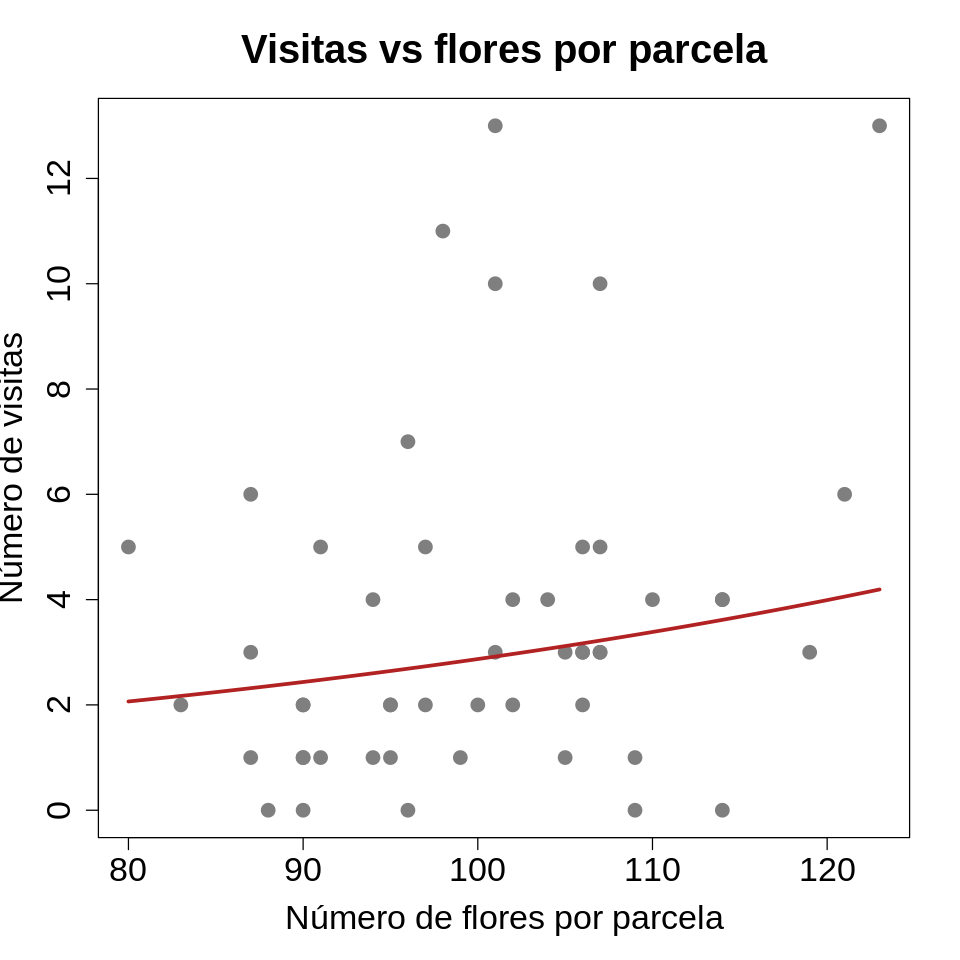

In [62]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Grafico de curva general
plot(visitas ~ flores_parcela, data = datos,
     col = "grey50",
     pch = 19,
     cex= 1.5,
     xlab = "Número de flores por parcela",
     ylab = "Número de visitas",
     main = "Visitas vs flores por parcela",
     cex.lab=1.7,
     cex.axis=1.7,
     cex.main= 2)

# Línea de predicción general (efectos fijos)
lines(flores_seq$flores_parcela, flores_seq$pred, col = "firebrick", lwd = 3)


### <font size= 4> **Curvas de regresión por campo** </font>

In [54]:
# Crear un data frame nuevo para predecir con el modelo
flores_seq_grupo <- expand.grid(
  flores_parcela = seq(min(datos$flores_parcela), max(datos$flores_parcela),
  length.out = 100),
  campo = unique(datos$campo)
)

In [ ]:
head(flores_seq_grupo,4)

,flores_parcela,campo
,<dbl>,<fct>
1,80.00000,1
2,80.43434,1
3,80.86869,1
4,81.30303,1


In [55]:
# Predicciones con efectos aleatorios incluidos
flores_seq_grupo$pred <- predict(modelo_glmm, newdata = flores_seq_grupo,
type = "response") # agregamos los predichos al data frame flores_seq_grupo


In [87]:
head(flores_seq_grupo,4)

,flores_parcela,campo,pred
,<dbl>,<fct>,<dbl>
1,80.00000,1,2.661714
2,80.43434,1,2.680817
3,80.86869,1,2.700056
4,81.30303,1,2.719434


In [56]:
# Asegurarse de que los colores por campo sean únicos
colores <- c("#d55e00", "#cc79a7", "#0072b2", "#f0e442", "#009e73")#Colores HEX
niveles_campo <- levels(datos$campo)
colores_por_campo <- setNames(colores, niveles_campo)

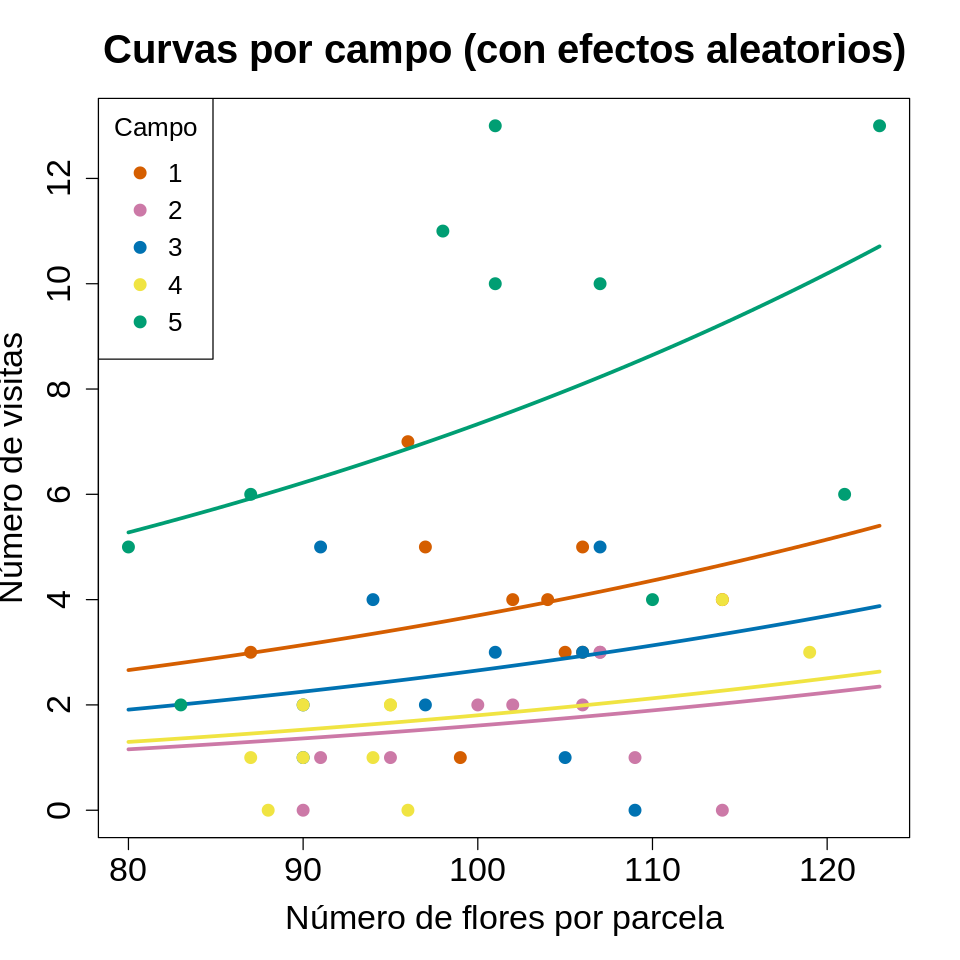

In [61]:
# Creamos un gráfico vacío con los ejes ajustados
plot(datos$flores_parcela, datos$visitas,
     type = "n",
     xlab = "Número de flores por parcela",
     ylab = "Número de visitas",
     main = "Curvas por campo (con efectos aleatorios)",
     cex.lab=1.7,
     cex.axis=1.7,
     cex.main= 2)

for (campo_id in niveles_campo) {
  datos_campo <- subset(datos, datos$campo == campo_id)
  points(datos_campo$flores_parcela, datos_campo$visitas,
         col = colores_por_campo[campo_id],pch= 19, cex=1.3)

  pred_campo <- subset(flores_seq_grupo, flores_seq_grupo$campo == campo_id)
  lines(pred_campo$flores_parcela, pred_campo$pred,
        col = colores_por_campo[campo_id], lwd = 3)
}

# Agregar leyenda
legend("topleft", legend = niveles_campo, col = colores, pch = 19, cex=1.3,
title = "Campo")

<a name='7'></a>
#  **7) Resumen final**


| Modelo | Supuestos sobre Y     | Casos de uso          | Limitaciones                                     |
| ------ | --------------------- | --------------------- | ------------------------------------------------ |
| LM     | Normal, homocedástica | Continuas normales    | Mal para conteos, grupos                         |
| GLM    | Poisson (u otra)      | Conteos, proporciones | No modela estructura jerárquica                  |
| GLMM   | Poisson + estructura  | Conteos agrupados     | Más complejo, requiere cuidado en interpretación |


<a name='7.1'></a>
## 7.1) Check-list para ajustar modelos ✅


<font size =4>  
    
* ☑ **1-** Formular la pregunta y definir variables.  
    
* ☑ **2-** Explorar datos.
    
* ☑ **3-** Revisar distribución de la variable respuesta.
    
* ☑ **4-** Chequear colinealidad (con cor(), VIF).
    
* ☑ **5-** Estandarizar variables si es necesario. Esto en caso de que los predictores tengan magnitudes muy diferentes.
    
* ☑ **6-** Elegir tipo de modelo.
    
* ☑ **7-** Ajustar los modelos.
    
* ☑ **8-** Seleccionar el mejor modelo.
    
* ☑ **9-** Evaluar supuestos y ajuste.
    
* ☑ **10-** Interpretar coeficientes.
    
* ☑ **11-** Graficar y comunicar.</font>

<a name='8'></a>
#  **8) Sección adicional: Regresiones múltiples**
En esta clase hemos ajustado modelos con una sola variable predictora. Pero en la realidad muchas veces pasa que podemos tener muchos predictores que pueden estar explicando la variable respuesta.  

Como una ampliación del modelo de regresión lineal simple se pueden incorporar variables independientes que expliquen a la variable dependiente. El modelo entonces sumará tantos parámetros como nuevos predictores se agreguen.

Les dejamos un ejemplo con dos predictores. Elejimos ajustar un modelo con dos predictores para poder mostrar en un gráfico como son las relaciones entre todas las variables del modelo.

Para no hacer el código muy largo, no agregamos aquí la evaluación de supuestos. Pero la metodología es similar que para los demás modelos.

Los datos con los cuales vamos a trabajar tienen mediciones de superficie de hojas de una especie de planta, valores de radicación UV y humedad relativa. Queremos evaluar si la superficie de la hoja depende de la radiación UV que recibe y la humedad relativa del ambiente.






In [24]:
path3 <- "./data/superficie_hoja.csv"
datos_sup <- read.table(path3,header = T, dec = ".", sep = ",")

In [25]:
head(datos_sup,4)

,area_hoja,radiacion_uv,humedad_relativa
,<dbl>,<dbl>,<dbl>
1,26.69571,8.077661,49.64490
2,37.43855,7.576725,53.36872
3,15.46727,10.523224,32.46317
4,35.60521,5.563832,51.68380


In [66]:
#Chequeo de colinealidad
cor(datos_sup$radiacion_uv, datos_sup$humedad_relativa)

[1] 0.2412013

In [67]:
#Ajustamos el modelo
modelo <- lm(area_hoja ~ radiacion_uv + humedad_relativa, data = datos_sup)
summary(modelo)


Call:
lm(formula = area_hoja ~ radiacion_uv + humedad_relativa, data = datos_sup)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8374 -2.3736 -0.2602  2.5465 10.1191 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       9.27235    1.85919   4.987 2.68e-06 ***
radiacion_uv     -0.90667    0.15725  -5.766 9.65e-08 ***
humedad_relativa  0.53138    0.02218  23.954  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.978 on 97 degrees of freedom
Multiple R-squared:  0.8554,	Adjusted R-squared:  0.8524 
F-statistic: 286.9 on 2 and 97 DF,  p-value: < 2.2e-16


In [68]:
#Predicciones y gráfico
# Grilla de predicción - Creamos datos nuevos y creamos una matriz de predichos
x <- seq(min(datos_sup$radiacion_uv), max(datos_sup$radiacion_uv),
      length.out = 30)

y <- seq(min(datos_sup$humedad_relativa), max(datos_sup$humedad_relativa),
      length.out = 30)

grilla <- expand.grid(radiacion_uv = x, humedad_relativa = y)

z <- matrix(predict(modelo, newdata = grilla), nrow = 30, ncol = 30)



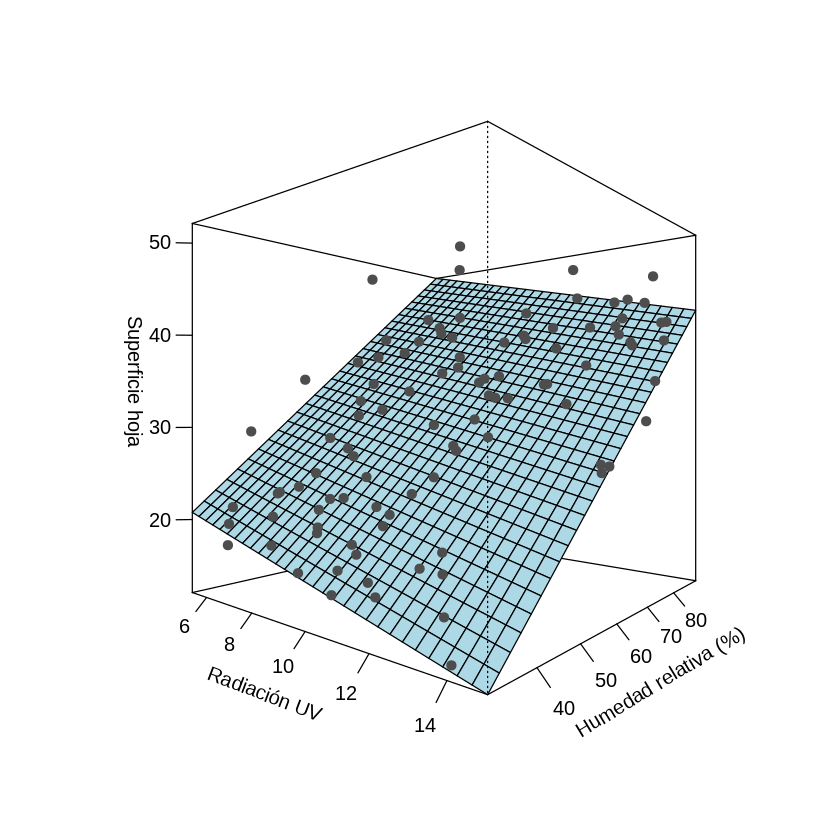

In [ ]:
# Crear el gráfico y guardarlo
res <- persp(x, y, z,
             theta =40, phi = 0, expand = 1,
             col = "lightblue",
             xlab = "Radiación UV", ylab = "Humedad relativa (%)",
             zlab = "Superficie hoja",
             ticktype = "detailed")

# Convertir las coordenadas 3D de los datos observados al sistema del gráfico
puntos <- trans3d(x = datos_sup$radiacion_uv,
                  y = datos_sup$humedad_relativa,
                  z = datos_sup$area_hoja,
                  pmat = res)

# Agregar los puntos al gráfico
points(puntos, col = "grey30", pch = 19)



<a name='9'></a>
# 9) Referencias
* Zuur, A., Ieno, E. N., Walker, N., Saveliev, A. A., & Smith, G. M. (2009). Mixed effects models and extensions in ecology with R. Springer.